<a href="https://colab.research.google.com/github/Andavaro/AnalisisDeDatos/blob/main/TP_An%C3%A1lisisDeDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabajo Práctico integrador

##Importar librerías:

In [177]:
import os
import numpy as np
import pandas as pd
from scipy import stats
from google.colab import drive
from matplotlib import pyplot as plt
import seaborn as sns

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Cargar dataset:

In [132]:
inventories = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/inventories.csv')
parts = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/inventory_parts.csv')
sets = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/sets.csv')
themes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/themes.csv')

In [133]:
inventories.head()

,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


In [134]:
parts.head()

,inventory_id,part_num,color_id,quantity,is_spare
0,1,48379c01,72,1,f
1,1,48395,7,1,f
2,1,mcsport6,25,1,f
3,1,paddle,0,1,f
4,3,11816pr0005,78,1,f


In [135]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [136]:
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


###Nuevos dataset:

In [137]:
final_set=sets.copy()
for s in final_set.set_num:
  if inventories.index[inventories.isin([s])['set_num']==True].tolist() != []:
    final_set.set_num[final_set.index[(final_set['set_num'] == s)].tolist()[0]]=inventories.id[inventories.index[(inventories['set_num'] == s)].tolist()[0]]
  else:
    final_set.set_num[final_set.index[(final_set['set_num'] == s)].tolist()[0]]='NaN'


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [138]:
final_set.to_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/final_set.csv')

In [139]:
final_parts=parts.copy().assign(theme='NaN')
t_anterior=0
for t in final_parts.inventory_id:
  if t != t_anterior:
    if final_set.index[final_set.isin([t])['set_num']==True].tolist() != []:
      final_parts.theme[final_parts.index[(final_parts['inventory_id'] == t)].tolist()]=final_set.theme_id[final_set.index[(final_set['set_num'] == t)].tolist()[0]]
      t_anterior=t
    else:
      final_parts.theme[final_parts.index[(final_parts['inventory_id'] == t)].tolist()]='NaN'
      t_anterior=t
      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [143]:
dfnull=pd.to_numeric(final_parts.part_num, errors='coerce').isnull()
lista=dfnull.index[(dfnull == True)].tolist()

part_max=pd.to_numeric(final_parts.part_num, errors='coerce').max()
for l in lista:
  if final_parts.part_num[l]==parts.part_num[l]:
    part_max=part_max+1
    final_parts.part_num[final_parts.index[(final_parts['part_num'] == final_parts.part_num[l])].tolist()]=part_max

final_parts.part_num=pd.to_numeric(final_parts.part_num, errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [152]:
final_parts.theme=pd.to_numeric(final_parts.theme, errors='coerce')

In [159]:
final_parts.to_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/final_parts.csv')

##Análisis exploratorio inicial:

In [168]:
#final_set = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/final_set.csv')
#final_set.pop('Unnamed: 0')
final_parts = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/final_parts.csv')
final_parts.pop('Unnamed: 0')

0              0
1              1
2              2
3              3
4              4
           ...  
580246    580246
580247    580247
580248    580248
580249    580249
580250    580250
Name: Unnamed: 0, Length: 580251, dtype: int64

In [169]:
final_parts.head(5)

,inventory_id,part_num,color_id,quantity,is_spare,theme
0,1,10016415.0,72,1,f,460.0
1,1,48395.0,7,1,f,460.0
2,1,10016416.0,25,1,f,460.0
3,1,10016417.0,0,1,f,460.0
4,3,10016418.0,78,1,f,494.0


In [170]:
final_parts.describe()

,inventory_id,part_num,color_id,quantity,theme
count,580251.000000,5.802510e+05,580251.000000,580251.000000,579544.000000
mean,8605.285444,2.148518e+06,78.472787,3.324730,274.287850
std,4958.375522,4.089915e+06,622.238597,8.229816,190.327808
min,1.000000,1.000000e+00,-1.000000,1.000000,1.000000
25%,4352.000000,3.460000e+03,1.000000,1.000000,101.000000
50%,8635.000000,1.024700e+04,15.000000,2.000000,236.000000
75%,12794.000000,8.769700e+04,71.000000,4.000000,466.000000
max,18708.000000,1.003268e+07,9999.000000,1440.000000,614.000000


In [171]:
final_parts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580251 entries, 0 to 580250
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   inventory_id  580251 non-null  int64  
 1   part_num      580251 non-null  float64
 2   color_id      580251 non-null  int64  
 3   quantity      580251 non-null  int64  
 4   is_spare      580251 non-null  object 
 5   theme         579544 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 26.6+ MB


In [161]:
def display_dataset_distributions(dataset):
    fig = dataset.hist(xlabelsize=12, ylabelsize=12,figsize=(22,10))
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()

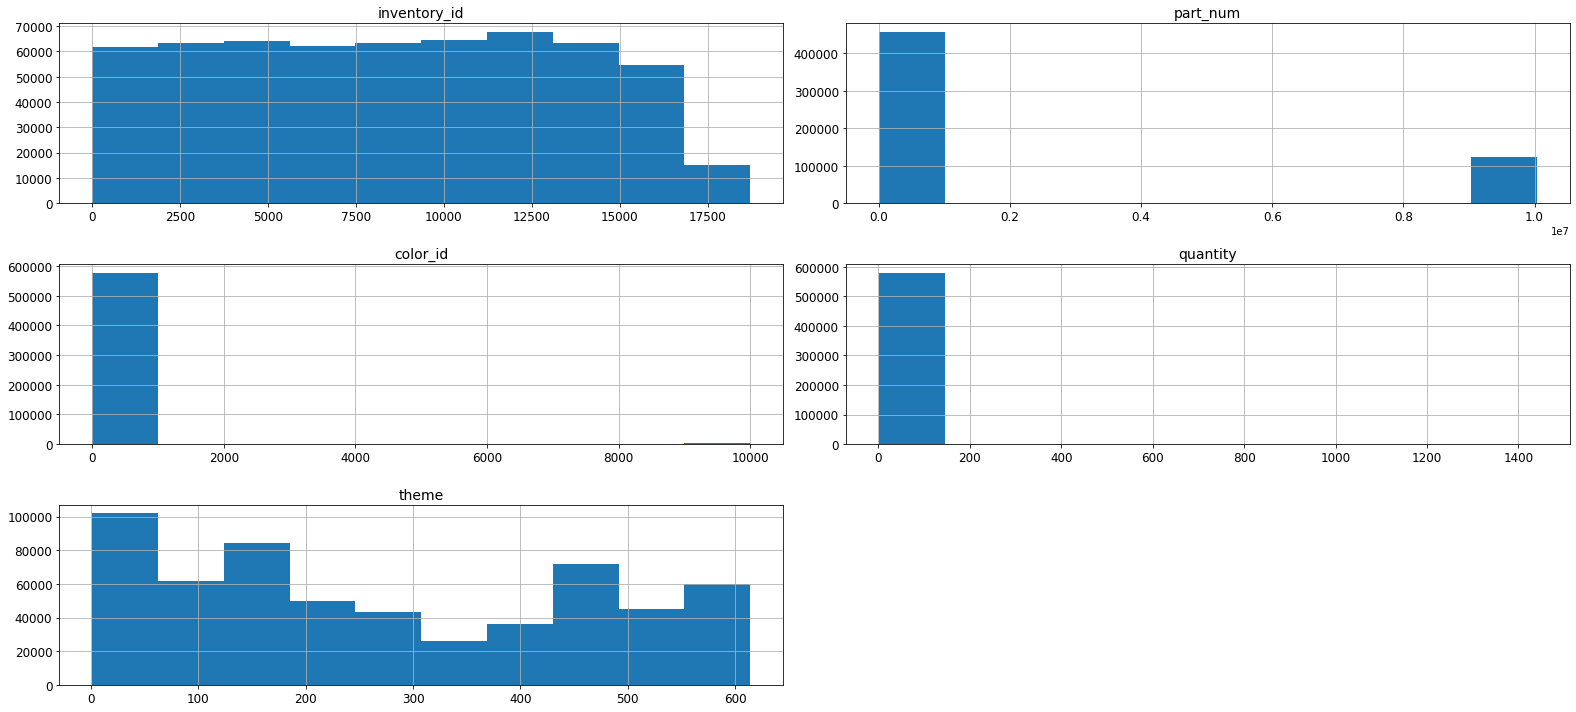

In [162]:
display_dataset_distributions(final_parts)

In [172]:
final_parts.isnull().sum()

inventory_id      0
part_num          0
color_id          0
quantity          0
is_spare          0
theme           707
dtype: int64

In [173]:
final_parts.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


inventory_id    4.958376e+03
part_num        4.089915e+06
color_id        6.222386e+02
quantity        8.229816e+00
theme           1.903278e+02
dtype: float64

In [174]:
cov_matrix = final_parts[['part_num', 'theme']].cov()
cov_matrix

,part_num,theme
part_num,1.672740e+13,1.708532e+07
theme,1.708532e+07,3.622467e+04


In [175]:
corr_matrix = final_parts.corr(method='pearson')
corr_matrix

,inventory_id,part_num,color_id,quantity,theme
inventory_id,1.000000,-0.010041,-0.001599,-0.001689,0.062291
part_num,-0.010041,1.000000,0.087145,-0.047747,0.021946
color_id,-0.001599,0.087145,1.000000,-0.018162,0.030409
quantity,-0.001689,-0.047747,-0.018162,1.000000,-0.024154
theme,0.062291,0.021946,0.030409,-0.024154,1.000000


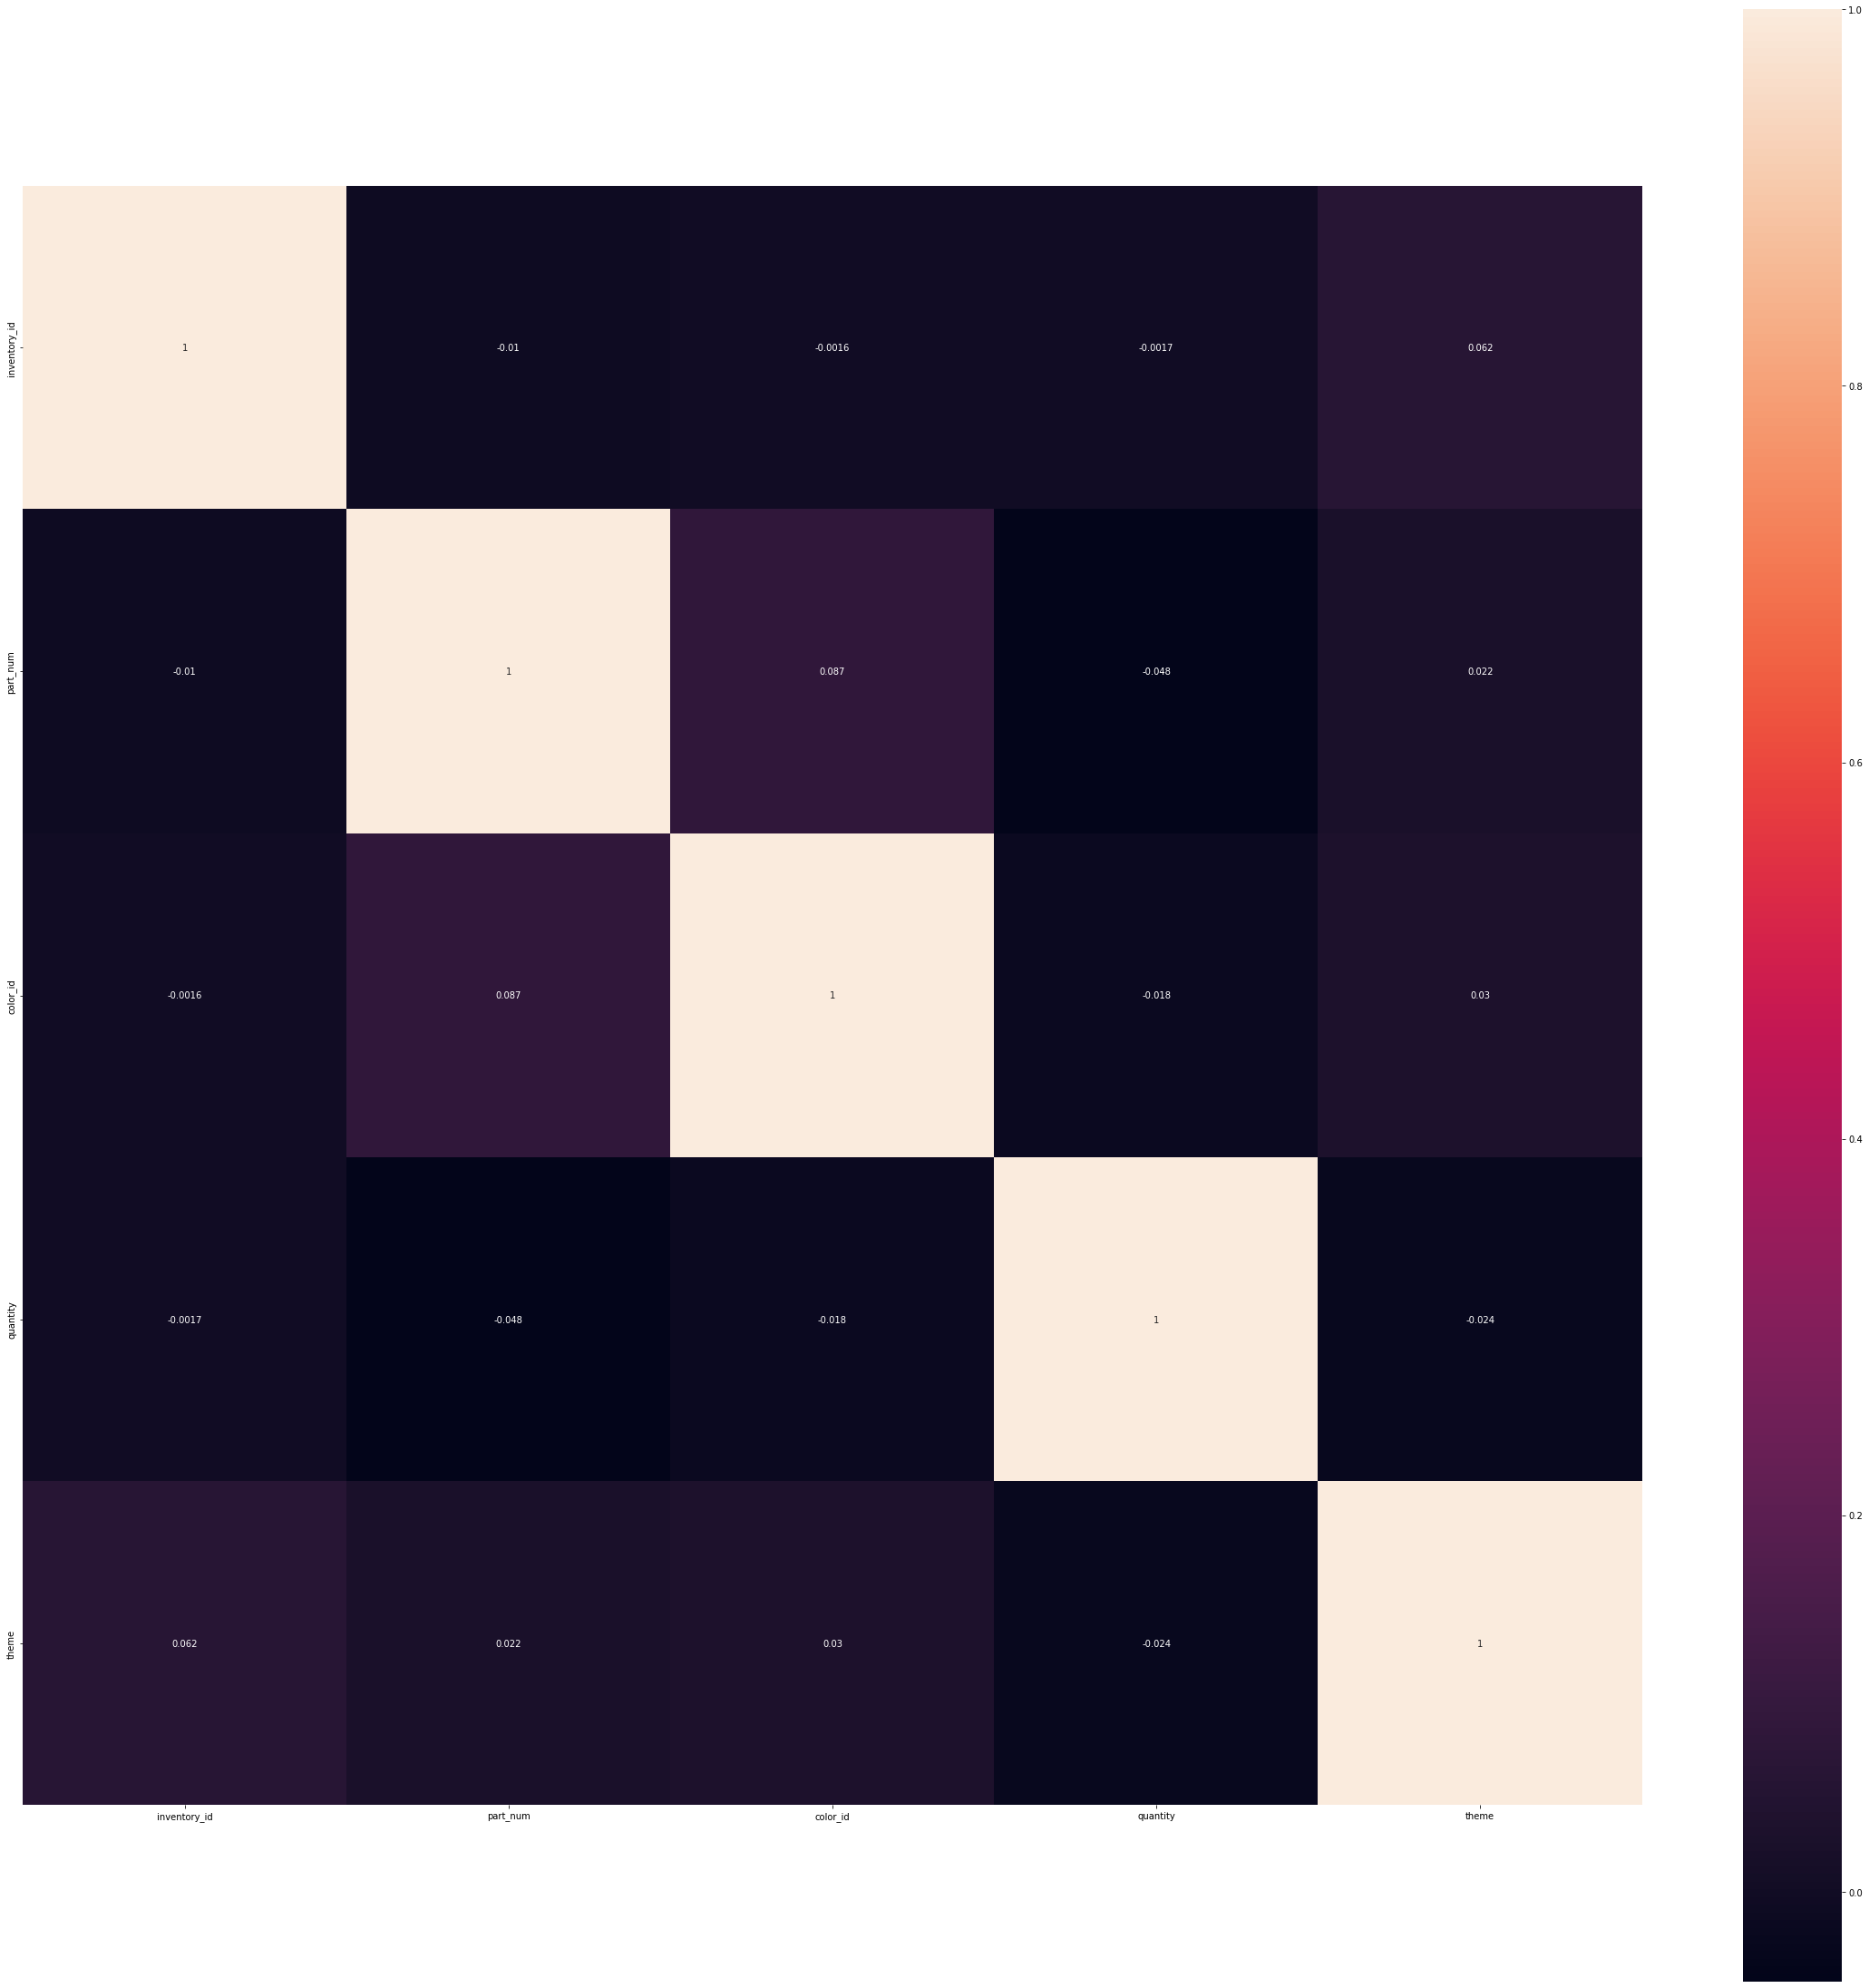

In [176]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(40, 40))

sns.heatmap(
    corr_matrix,
    square    = True,
    ax        = ax,
    annot     = True
)

ax.tick_params(labelsize = 10)